## Load the dataset:

In [30]:
import pandas as pd
data = pd.read_csv('heart.csv')


## Handle missing values:

In [32]:
data = data.dropna()


## Encode categorical variables using one-hot encoding:

In [34]:
data = pd.get_dummies(data, columns=['sex'])


## Scale numerical features:

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['age', 'chol', 'trestbps']] = scaler.fit_transform(data[['age', 'chol', 'trestbps']])


## Perform exploratory data analysis:

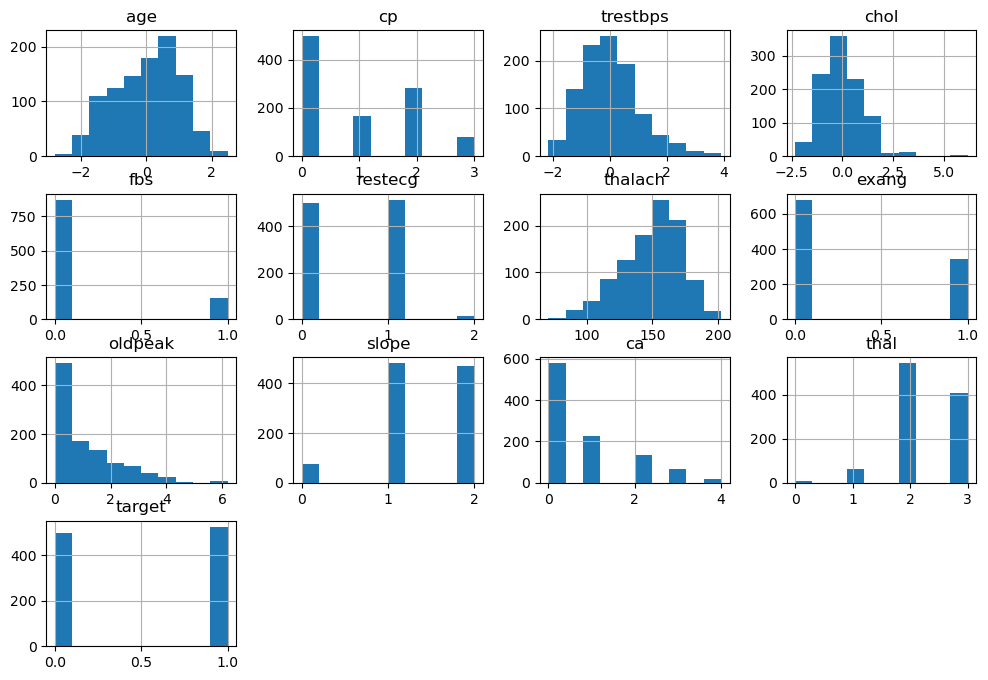

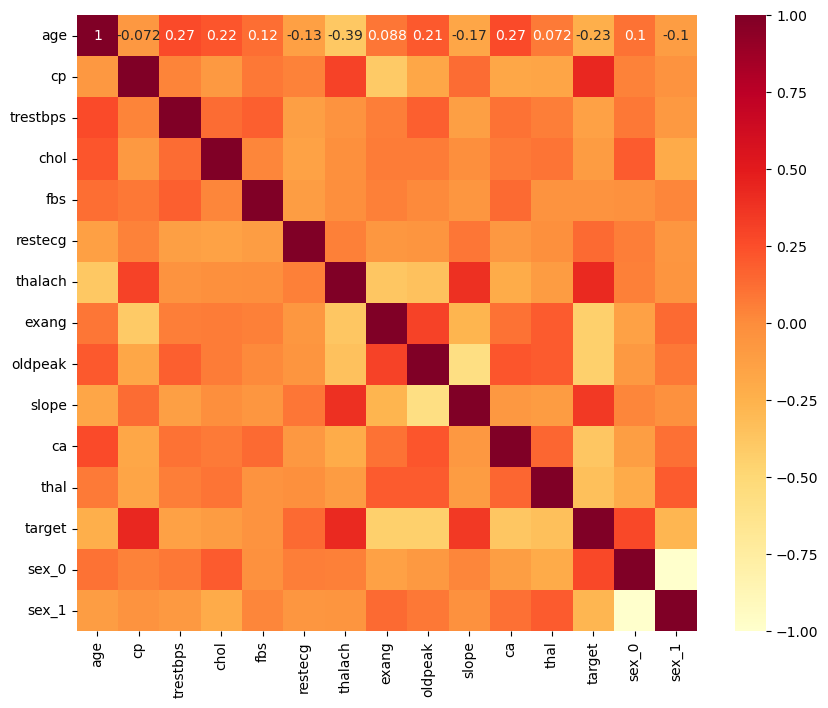

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the data
data.hist(figsize=(12, 8))
plt.show()

# Visualize the correlations between features and the target variable
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='YlOrRd')
plt.show()



## Visualize correlations between features and the target variable:

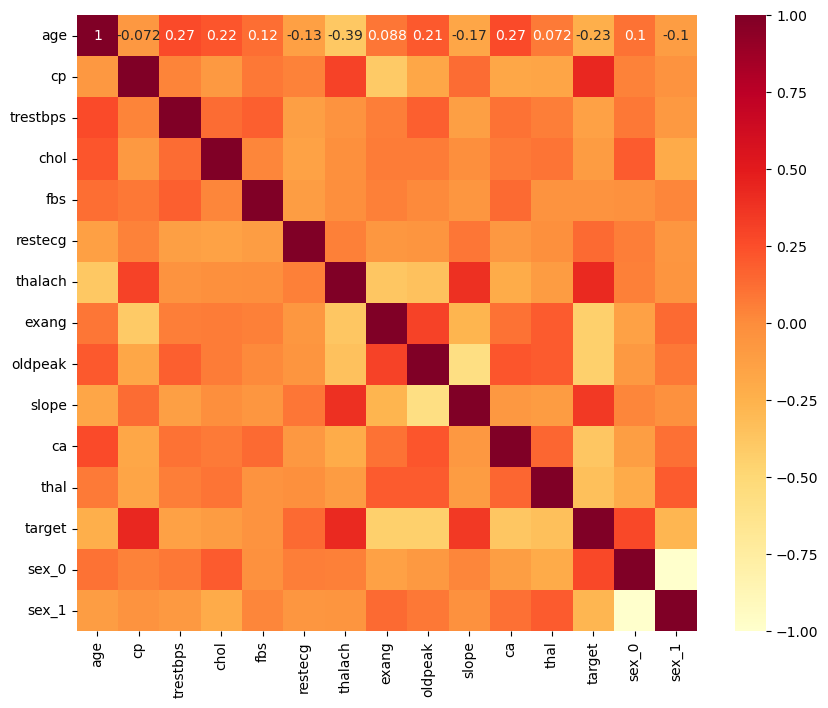

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='YlOrRd')
plt.show()



## Split the data into training and testing sets

In [45]:
from sklearn.model_selection import train_test_split
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train a logistic regression model on the training set:

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

## Include regularization to prevent overfitting:

In [49]:
model = LogisticRegression(penalty='l2', C=1.0, random_state=42)
model.fit(X_train, y_train)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

## Evaluate the model on the test set:

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('ROC-AUC:', roc_auc_score(y_test, y_pred))


Accuracy: 0.7951219512195122
Precision: 0.7563025210084033
Recall: 0.8737864077669902
F1-score: 0.8108108108108107
ROC-AUC: 0.7947363411383972


## Plot the ROC curve and calculate the AUC value:

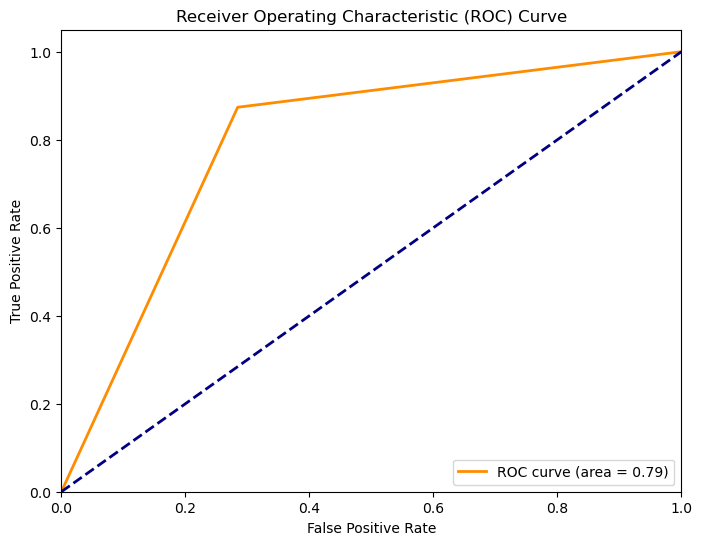

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Interpret the coefficients of the logistic regression model:

In [55]:
coef = model.coef_[0]
feature_names = X.columns
for i, c in enumerate(coef):
    print(f"Feature: {feature_names[i]}, Coefficient: {c:.2f}")


Feature: age, Coefficient: -0.02
Feature: cp, Coefficient: 0.85
Feature: trestbps, Coefficient: -0.31
Feature: chol, Coefficient: -0.46
Feature: fbs, Coefficient: -0.20
Feature: restecg, Coefficient: 0.25
Feature: thalach, Coefficient: 0.03
Feature: exang, Coefficient: -0.86
Feature: oldpeak, Coefficient: -0.69
Feature: slope, Coefficient: 0.51
Feature: ca, Coefficient: -0.82
Feature: thal, Coefficient: -1.09
Feature: sex_0, Coefficient: 0.50
Feature: sex_1, Coefficient: -1.27


## Calculate the odds ratios for the features:

In [59]:
import numpy as np

odds_ratios = np.exp(coef)
for i, o in enumerate(odds_ratios):
    print(f"Feature: {feature_names[i]}, Odds Ratio: {o:.2f}")


Feature: age, Odds Ratio: 0.98
Feature: cp, Odds Ratio: 2.35
Feature: trestbps, Odds Ratio: 0.73
Feature: chol, Odds Ratio: 0.63
Feature: fbs, Odds Ratio: 0.82
Feature: restecg, Odds Ratio: 1.29
Feature: thalach, Odds Ratio: 1.03
Feature: exang, Odds Ratio: 0.42
Feature: oldpeak, Odds Ratio: 0.50
Feature: slope, Odds Ratio: 1.67
Feature: ca, Odds Ratio: 0.44
Feature: thal, Odds Ratio: 0.34
Feature: sex_0, Odds Ratio: 1.65
Feature: sex_1, Odds Ratio: 0.28
